# **Comparison of Covid19 trend in Italy and Sweden**

We first examine the 36-day trend of cases in Italy and Sweden since the day they reached 1000 (March 3 for Italy, March 15 for Sweden). 

Italy has been in lockdown since March 9 and plans to completely lift the lockdown on May 4. Sweden has not enforced a lockdown as of April 19.

Since mid March, Sweden only tests:

*   Hospitalized patients from risk groups (elderly, immunocompromised, etc.)
*   Healthcare personnel with symptoms

so the active cases for Sweden [1] have been compared to the numbers of hospitalized patients in Italy [2]. The active cases for Sweden are calculated as: total cases - deaths - recoveries.

The graphs also show intensive care unit cases and deaths for the same time period (March 3 - April 7 for Italy, March 15 - April 19 for Sweden).

[1] [C19.SE - Coronavirus i Sverige](https://c19.se/)

[2] [Il Sole 24 Ore - Coronavirus in Italia](https://lab24.ilsole24ore.com/coronavirus/)



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


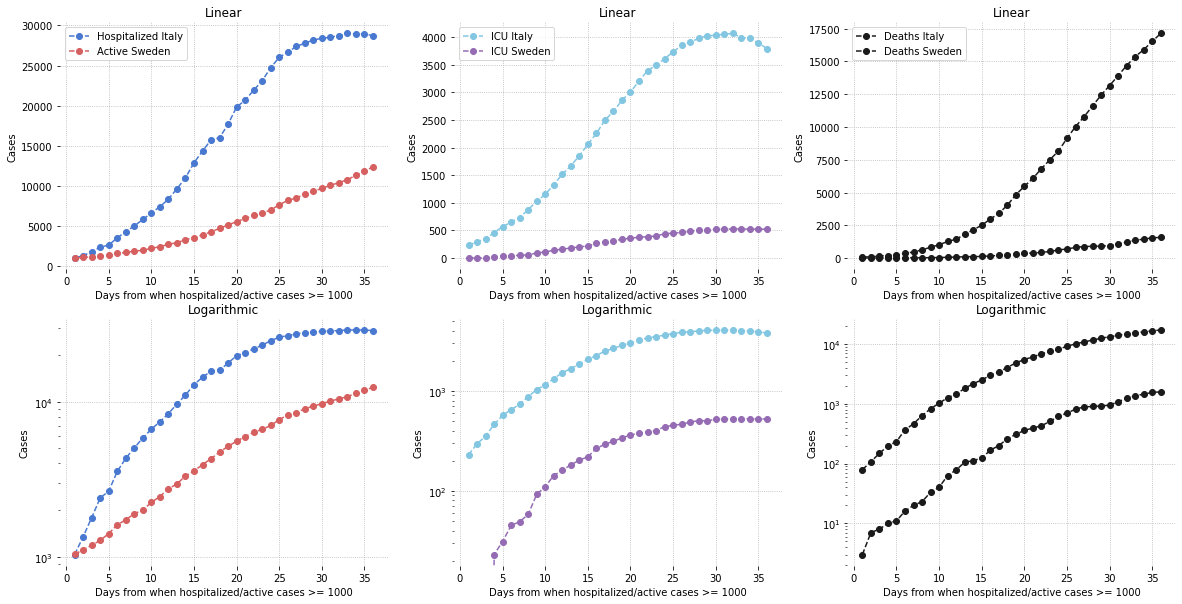

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

italy_hospitalized = [1034, 1346, 1790, 2394, 2651, 3550, 4316,
                     5038, 5838, 6650, 7426, 8372, 9663, 11025, 
                     12894, 14363, 15757, 16020, 17708, 19846, 
                     20692, 21937, 23112, 24753, 26029, 26676,
                     27386, 27795, 28192, 28403, 28540, 28741, 
                     29010, 28949, 28976, 28718]


sweden_active = [1036, 1113, 1187, 1276, 1412, 1607, 1734,
                1897, 2003, 2243, 2448, 2747, 2948, 3326, 
                3574, 3928, 4291, 4735, 5157, 5566, 5961,
                6350, 6634, 7026, 7653, 8233, 8498, 9016,
                9352, 9717, 10087, 10427, 10794, 11337, 11871,
                12382]

italy_icu = [229, 295, 351, 462, 567, 
             650, 733, 877, 1028, 1153, 
             1328, 1518, 1672, 1851, 2060,
             2257, 2498, 2655, 2857, 3009, 
             3204, 3396, 3489, 3612, 3732,
             3856, 3906, 3981, 4023, 4035,
             4053, 4068, 3994, 3977, 3898,
             3792]

sweden_icu = [0, 0, 0, 23, 31,
              45, 49, 58, 92,
              110, 142, 160, 182,
              202, 219, 265, 293,
              312, 339, 361, 376,
              387, 400, 439, 451, 
              464, 486, 504, 500, 
              521, 522, 528, 527,
              523, 524, 522]

italy_d = [79, 107, 148, 197, 233, 366,
           463, 631, 827, 1016, 1266, 1441,
           1809, 2158, 2503, 2978, 3405,
           4032, 4825, 5475, 6077, 6820,
           7503, 8165, 9134, 10023, 10779, 
           11591, 12428, 13155, 13915, 14681,
           15362, 15887, 16523, 17127]

sweden_d = [3, 7, 8, 10, 11, 16,
            20, 23, 33, 40, 63, 78, 105,
            112, 123, 167, 199, 259,
            307, 358, 391, 428, 506, 618,
            696, 812, 881, 901, 915, 946,
            1084, 1223, 1360, 1442, 1546,
            1578]

x = np.arange(1, len(italy_hospitalized) + 1)

fig = plt.figure()
ax1 = fig.add_subplot(231)
ax1.plot(x, italy_hospitalized, '--bo', label='Hospitalized Italy')
ax1.plot(x, sweden_active, '--ro', label='Active Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax1.set_ylabel('Cases')
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(234)
ax2.plot(x, italy_hospitalized, '--bo')
ax2.plot(x, sweden_active, '--ro')
ax2.set_title('Logarithmic')
ax2.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax2.set_ylabel('Cases')
ax2.set_yscale('log')
ax2.axes.grid(linestyle='dotted')

ax3 = fig.add_subplot(232)
ax3.plot(x, italy_icu, '--co', label='ICU Italy')
ax3.plot(x, sweden_icu, '--mo', label='ICU Sweden')
ax3.legend(loc="upper left")
ax3.set_title('Linear')
ax3.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax3.set_ylabel('Cases')
ax3.axes.grid(linestyle='dotted')

ax4 = fig.add_subplot(235)
ax4.plot(x, italy_icu, '--co')
ax4.plot(x, sweden_icu, '--mo')
ax4.set_title('Logarithmic')
ax4.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax4.set_ylabel('Cases')
ax4.set_yscale('log')
ax4.axes.grid(linestyle='dotted')

ax5 = fig.add_subplot(233)
ax5.plot(x, italy_d, '--ko', label='Deaths Italy')
ax5.plot(x, sweden_d, '--ko', label='Deaths Sweden')
ax5.legend(loc="upper left")
ax5.set_title('Linear')
ax5.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax5.set_ylabel('Cases')
ax5.axes.grid(linestyle='dotted')

ax6 = fig.add_subplot(236)
ax6.plot(x, italy_d, '--ko')
ax6.plot(x, sweden_d, '--ko')
ax6.set_title('Logarithmic')
ax6.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax6.set_ylabel('Cases')
ax6.set_yscale('log')
ax6.axes.grid(linestyle='dotted')

sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
fig.set_figheight(10)
fig.set_figwidth(20)
plt.show()

We compare the least-squares best exponential and quadratic fit to the Swedish data and see the predicted number of active cases for April 15 for both models. (Last prediction date: April 8). 

It looks like the trend is already starting to reach the peak of the bell curve. 

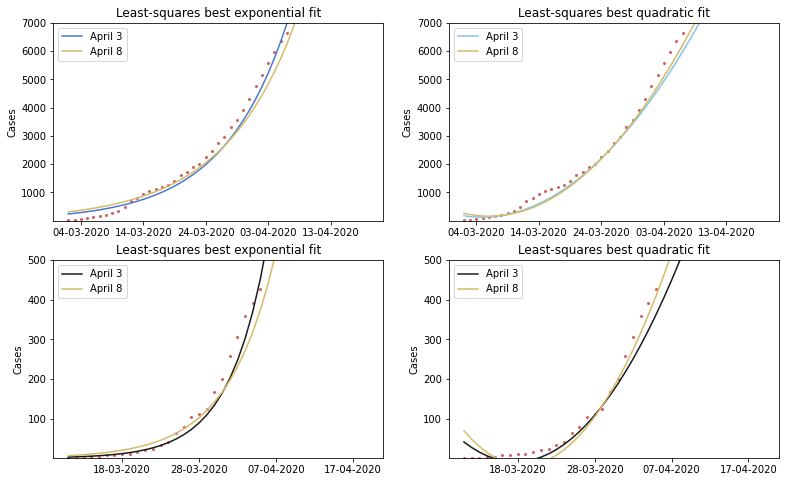

Predicted number of cases for April 15 for the exponential model, April 8: 13543
Actual cases for April 15: 10427

Predicted number of deaths for April 15 for the exponential model, April 8: 1906
Actual deaths for April 15: 1223


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


sweden_active = [15, 29, 51, 93, 136, 160, 202, 259, 354, 498, 685,
                812, 958, 1036, 1113, 1187, 1276, 1412, 1607, 1734,
                1897, 2003, 2243, 2448, 2747, 2948, 3326, 
                3574, 3928, 4291, 4753, 5157, 5566, 5961,
                6350, 6634, 7026, 7653, 8233, 8498, 9016, 9352, 9717,
                10087, 10427, 10794, 11337, 11871, 12382]


sweden_d = [1, 1, 1, 2, 3, 7, 
            8, 10, 11, 16, 20, 23, 33, 
            40, 63, 78, 105, 112, 123, 
            167, 199, 259, 307, 358, 
            391, 428, 506, 618, 696, 
            812, 881, 901, 915, 946,
            1084, 1223, 1360, 1442, 1546,
            1578]


a_exp = [235.538]
a_exp.append(309.386)

b_exp = [0.0968205]
b_exp.append(0.0858872)

a_quad = [5.65858]
a_quad.append(6.32649)

b_quad = [-32.1161]
b_quad.append(-51.4366)

c_quad = [169.72]
c_quad.append(260.867)

ad_exp = [2.77108]
ad_exp.append(6.43314)

bd_exp = [0.20393]
bd_exp.append(0.162615)

ad_quad = [1.11451]
ad_quad.append(1.44654)

bd_quad = [-14.9806]
bd_quad.append(-22.502)

cd_quad = [40.8365]
cd_quad.append(68.9398)

x = np.arange(len(sweden_active))
exp_fit = [a_exp[0] * np.exp(b_exp[0] * i) for i in x]
quad_fit = [a_quad[0] * i**2 + b_quad[0] * i + c_quad[0] for i in x]
exp_fit_8 = [a_exp[1] * np.exp(b_exp[1] * i) for i in x]
quad_fit_8 = [a_quad[1] * i**2 + b_quad[1] * i + c_quad[1] for i in x]

xs_d = np.arange(len(sweden_d))
expd_fit = [ad_exp[0] * np.exp(bd_exp[0] * i) for i in xs_d]
quadd_fit = [ad_quad[0] * i**2 + bd_quad[0] * i + cd_quad[0] for i in xs_d]
expd_fit_8 = [ad_exp[1] * np.exp(bd_exp[1] * i) for i in xs_d]
quadd_fit_8 = [ad_quad[1] * i**2 + bd_quad[1] * i + cd_quad[1] for i in xs_d]

start = dt.date(2020, 3, 2)
end = start + dt.timedelta(days=len(sweden_active))
days = mdates.drange(start, end, dt.timedelta(days=1))

start = dt.date(2020, 3, 11)
end = start + dt.timedelta(days=len(sweden_d))
days_d = mdates.drange(start, end, dt.timedelta(days=1))

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(days, sweden_active, 'or', markersize=2)
ax1.plot(days, exp_fit, '-b', label='April 3')
ax1.plot(days, exp_fit_8, '-y', label='April 8')
ax1.set_title('Least-squares best exponential fit')
ax1.set_ylabel('Cases')
ax1.set_ylim(1, 7000)
ax1.legend(loc="upper left")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))

ax2 = fig.add_subplot(222)
ax2.plot(days, sweden_active, 'or', markersize=2)
ax2.plot(days, quad_fit, '-c', label='April 3')
ax2.plot(days, quad_fit_8, '-y', label='April 8')
ax2.set_title('Least-squares best quadratic fit')
ax2.set_ylabel('Cases')
ax2.set_ylim(1, 7000)
ax2.legend(loc="upper left")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=10))

ax3 = fig.add_subplot(223)
ax3.plot(days_d, sweden_d, 'or', markersize=2)
ax3.plot(days_d, expd_fit, '-k', label='April 3')
ax3.plot(days_d, expd_fit_8, '-y', label='April 8')
ax3.set_title('Least-squares best exponential fit')
ax3.set_ylabel('Cases')
ax3.set_ylim(1, 500)
ax3.legend(loc="upper left")
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=10))

ax4 = fig.add_subplot(224)
ax4.plot(days_d, sweden_d, 'or', markersize=2)
ax4.plot(days_d, quadd_fit, '-k', label='April 3')
ax4.plot(days_d, quadd_fit_8, '-y', label='April 8')
ax4.set_title('Least-squares best quadratic fit')
ax4.set_ylabel('Cases')
ax4.set_ylim(1, 500)
ax4.legend(loc="upper left")
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=10))

fig.set_figheight(8)
fig.set_figwidth(13)
plt.show()

x_i = 44
x_d = 35

print("Predicted number of cases for April 15 for the exponential model, April 8: {:.0f}".format(a_exp[1] * np.exp(b_exp[1] * x_i)))
print(f"Actual cases for April 15: {sweden_active[44]}")
print()
print("Predicted number of deaths for April 15 for the exponential model, April 8: {:.0f}".format(ad_exp[1] * np.exp(bd_exp[1] * x_d)))
print(f"Actual deaths for April 15: {sweden_d[35]}")

We then compare the same data for the two countries from March 2 (the first day reported for Sweden) until today:

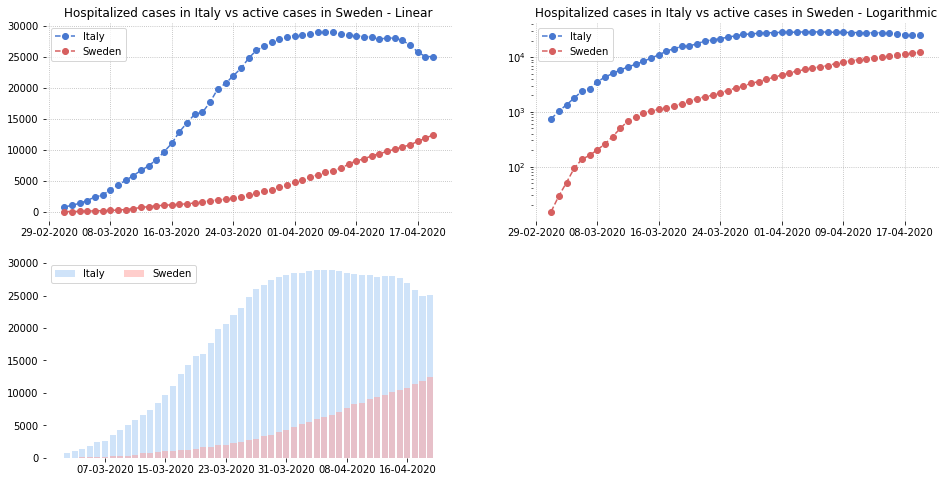

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

italy_hospitalized = [742, 1034, 1346, 1790, 2394, 2651, 3550, 4316,
                     5038, 5838, 6650, 7426, 8372, 9663, 11025,
                     12894, 14363, 15757, 16020, 17708, 19846, 
                     20692, 21937, 23112, 24753, 26029, 26676, 
                     27386, 27795, 28192, 28403, 28540, 28741, 
                     29010, 28949, 28976, 28718, 28485, 28399,
                     28242, 28144, 27847, 28023, 28011, 27643,
                     26893, 25786, 25007, 25033]

sweden_active = [15, 29, 51, 93, 136, 160, 202, 259, 354, 498, 685,
                812, 958, 1036, 1113, 1187, 1276, 1412, 1607, 1734,
                1897, 2003, 2243, 2448, 2747, 2948, 3326, 
                3574, 3928, 4291, 4735, 5157, 5566, 5961, 6350, 6634,
                7026, 7653, 8233, 8498, 9016, 9352, 9717, 10087, 10427,
                10794, 11337, 11871, 12382]

start = dt.date(2020, 3, 2)
end = start + dt.timedelta(days=len(italy_hospitalized))
days = mdates.drange(start, end, dt.timedelta(days=1))


fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(days, italy_hospitalized, '--bo', label='Italy')
ax1.plot(days, sweden_active, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Hospitalized cases in Italy vs active cases in Sweden - Linear')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=8))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(222)
ax2.plot(days, italy_hospitalized, '--bo', label='Italy')
ax2.plot(days, sweden_active, '--ro', label='Sweden')
ax2.legend(loc="upper left")
ax2.set_title('Hospitalized cases in Italy vs active cases in Sweden - Logarithmic')
ax2.set_yscale('log')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=8))
ax2.axes.grid(linestyle='dotted')

ax3 = fig.add_subplot(223)

sns.set_color_codes('pastel')
ax3.bar(days, italy_hospitalized, color='b', alpha=0.5, label='Italy')
ax3.bar(days, sweden_active, color='r', alpha=0.5, label='Sweden')
ax3.legend(ncol = 2, loc = 'upper left')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=8))

sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()

We then plot the daily increase for the same data and time period, as line graph and bar chart:

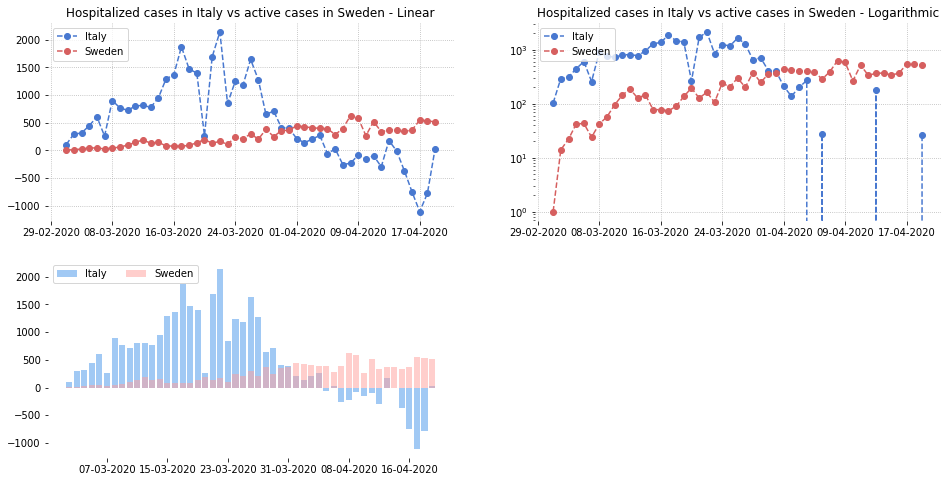

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

it_hosp_day = [103]
for i in range(1, len(italy_hospitalized)):
  it_hosp_day.append(italy_hospitalized[i] - italy_hospitalized[i - 1])

swe_active_day = [1]
for i in range(1, len(sweden_active)):
  swe_active_day.append(sweden_active[i] - sweden_active[i - 1])

start = dt.date(2020, 3, 2)
end = start + dt.timedelta(days=len(italy_hospitalized))
days = mdates.drange(start, end, dt.timedelta(days=1))


fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(days, it_hosp_day, '--bo', label='Italy')
ax1.plot(days, swe_active_day, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Hospitalized cases in Italy vs active cases in Sweden - Linear')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=8))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(222)
ax2.plot(days, it_hosp_day, '--bo', label='Italy')
ax2.plot(days, swe_active_day, '--ro', label='Sweden')
ax2.legend(loc="upper left")
ax2.set_title('Hospitalized cases in Italy vs active cases in Sweden - Logarithmic')
ax2.set_yscale('log')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=8))
ax2.axes.grid(linestyle='dotted')

sns.set_color_codes('pastel')
ax3 = fig.add_subplot(223)

ax3.bar(days, it_hosp_day, color='b', label='Italy')
ax3.bar(days, swe_active_day, color='r', alpha=0.5, label='Sweden')
ax3.legend(ncol = 2, loc = 'upper left')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=8))


sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()



We then compare the number of weekly total cases with the number of weekly total tests administered by both countries, from week 10 (starting March 2) to week 15 (ending April 12). On top of each bar we set the percentage of total cases per number of tests.

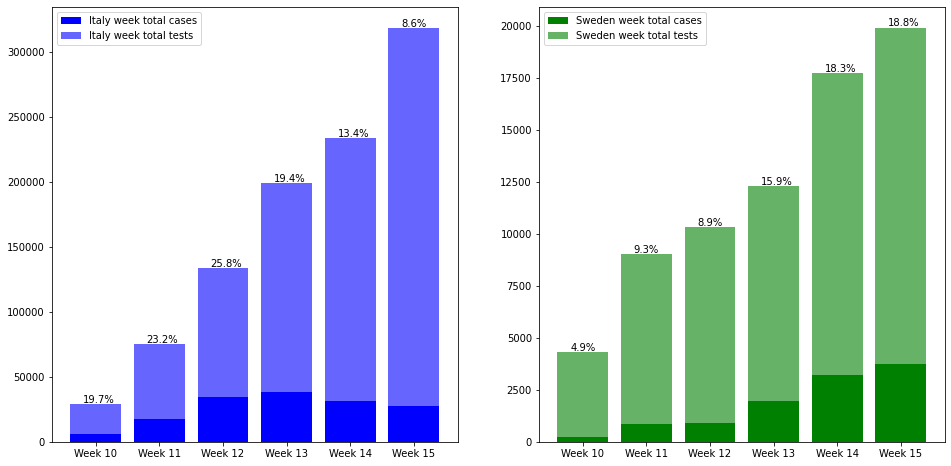

In [0]:
import numpy as np
import matplotlib.pyplot as plt

swe_total_week = {'Week 10': 211, 'Week 11': 838, 'Week 12': 921,
                  'Week 13': 1959, 'Week 14': 3231, 'Week 15': 3740}

swe_tests_week = {'Week 10': 4300, 'Week 11': 9000, 'Week 12': 10300,
                  'Week 13': 12300, 'Week 14': 17700, 'Week 15': 19900}

it_total_week = {'Week 10': 5681, 'Week 11': 17372, 'Week 12': 34390,
                 'Week 13': 38552, 'Week 14': 31259, 'Week 15': 27415}

it_tests_week = {'Week 10': 28810, 'Week 11': 74962, 'Week 12': 133503,
                'Week 13': 199128, 'Week 14': 233931, 'Week 15': 318732}

it_w_percent = []
for k, v in it_total_week.items():
  it_w_percent.append((v / it_tests_week[k]) * 100)

swe_w_percent = []
for k, v in swe_total_week.items():
  swe_w_percent.append((v / swe_tests_week[k]) * 100)


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.bar(it_total_week.keys(), it_total_week.values(), color='b', label='Italy week total cases')
ax1.bar(it_tests_week.keys(), it_tests_week.values(), color='b', label='Italy week total tests', alpha= 0.6)
for i, v in enumerate(it_w_percent):
    ax1.text(i - 0.2, list(it_tests_week.values())[i] + 1000, '{:.1f}%'.format(v),  color='black')
ax1.legend(loc="upper left")

ax2 = fig.add_subplot(122)
ax2.bar(swe_total_week.keys(), swe_total_week.values(), color='g', label='Sweden week total cases')
ax2.bar(swe_tests_week.keys(), swe_tests_week.values(), color='g', label='Sweden week total tests', alpha= 0.6)
for i, v in enumerate(swe_w_percent):
    ax2.text(i - 0.2, list(swe_tests_week.values())[i] + 70, '{:.1f}%'.format(v),  color='black')
ax2.legend(loc="upper left")

fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()


We then compare the total cases and deaths by age and gender for both countries. We compare the countries in a bar chart; unlike in the previous graphs, we stack the deaths on top of the total cases. Each bar displays the percentage of death cases for that age group/gender on the total of death cases. Data last updated on April 16 for Italy [1] and April 17 for Sweden [2].

[1] [Istituto Superiore di Sanità - Sorveglianza integrata COVID-19](https://www.epicentro.iss.it/coronavirus/sars-cov-2-sorveglianza-dati)

[2] [Folkhälsomyndigheten - Bekräftade fall i Sverige – daglig uppdatering](https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/bekraftade-fall-i-sverige/)

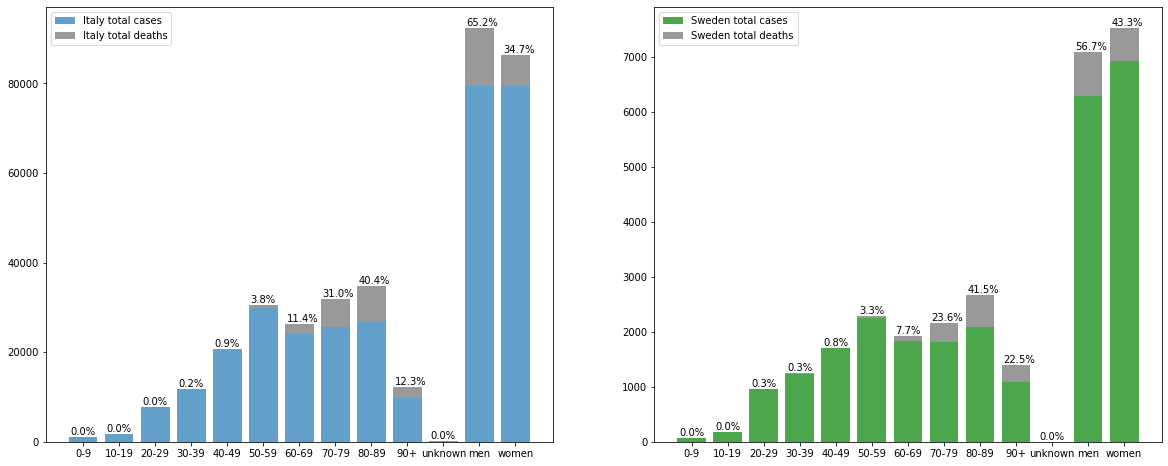

In [0]:
import numpy as np
import matplotlib.pyplot as plt

it_tot_age = {'0-9': 1123, '10-19': 1804, '20-29': 7737, '30-39': 11686,
              '40-49': 20519, '50-59': 29858, '60-69': 24040, '70-79': 25717,
              '80-89': 26706, '90+': 9813, 'unknown': 104, 'total': 159107}

it_d_age = {'0-9': 1, '10-19': 0, '20-29': 7, '30-39': 40,
            '40-49': 178, '50-59': 756, '60-69': 2284, '70-79': 6203,
            '80-89': 8070, '90+': 2455, 'unknown': 2, 'total': 19996}

swe_tot_age = {'0-9': 69, '10-19': 179, '20-29': 952, '30-39': 1241,
              '40-49': 1703, '50-59': 2242, '60-69': 1824, '70-79': 1822,
              '80-89': 2094, '90+': 1085, 'unknown': 5, 'total': 13216}

swe_d_age = {'0-9': 0, '10-19': 0, '20-29': 4, '30-39': 4,
             '40-49': 11, '50-59': 46, '60-69': 108, '70-79': 331,
             '80-89': 581, '90+': 315, 'unknown': 0, 'total': 1400}

it_tot_gender = {'men': 79370, 'women': 79357, 'total': 159107}

it_d_gender = {'men': 13044, 'women': 6932, 'total': 19996}

swe_tot_gender = {'men': 6291, 'women': 6922, 'total': 13216}

swe_d_gender = {'men': 794, 'women': 606, 'total': 1400}

it_t_age_percent = []
for k, v in it_tot_age.items():
  if k is not 'total':
    it_t_age_percent.append((v / it_tot_age['total']) * 100)

it_d_age_percent = []
for k, v in it_d_age.items():
  if k is not 'total':
    it_d_age_percent.append((v / it_d_age['total']) * 100)

swe_t_age_percent = []
for k, v in swe_tot_age.items():
  if k is not 'total':
    swe_t_age_percent.append((v / swe_tot_age['total']) * 100)

swe_d_age_percent = []
for k, v in swe_d_age.items():
  if k is not 'total':
    swe_d_age_percent.append((v / swe_d_age['total']) * 100)

it_t_gender_percent = []
for k, v in it_tot_gender.items():
  if k is not 'total':
    it_t_gender_percent.append((v / it_tot_gender['total']) * 100)

it_d_gender_percent = []
for k, v in it_d_gender.items():
  if k is not 'total':
    it_d_gender_percent.append((v / it_d_gender['total']) * 100)

swe_t_gender_percent = []
for k, v in swe_tot_gender.items():
  if k is not 'total':
    swe_t_gender_percent.append((v / swe_tot_gender['total']) * 100)

swe_d_gender_percent = []
for k, v in swe_d_gender.items():
  if k is not 'total':
    swe_d_gender_percent.append((v / swe_d_gender['total']) * 100)

for el in it_t_gender_percent:
  it_t_age_percent.append(el)

for el in it_d_gender_percent:
  it_d_age_percent.append(el)

for el in swe_t_gender_percent:
  swe_t_age_percent.append(el)

for el in swe_d_gender_percent:
  swe_d_age_percent.append(el)

it_tot_age.pop('total')
it_d_age.pop('total')
swe_tot_age.pop('total')
swe_d_age.pop('total')
it_tot_gender.pop('total')
it_d_gender.pop('total')
swe_tot_gender.pop('total')
swe_d_gender.pop('total')

it_tot_age['men'] = it_tot_gender['men']
it_tot_age['women'] = it_tot_gender['women']
it_d_age['men'] = it_d_gender['men']
it_d_age['women'] = it_d_gender['women']
swe_tot_age['men'] = swe_tot_gender['men']
swe_tot_age['women'] = swe_tot_gender['women']
swe_d_age['men'] = swe_d_gender['men']
swe_d_age['women'] = swe_d_gender['women']

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.bar(it_tot_age.keys(), it_tot_age.values(), label='Italy total cases', alpha=0.7,)
ax1.bar(it_d_age.keys(), it_d_age.values(), color='k', alpha=0.4,
        label='Italy total deaths', bottom=list(it_tot_age.values()))
for i, v in enumerate(it_d_age_percent):
    ax1.text(i - 0.35, list(it_tot_age.values())[i] + list(it_d_age.values())[i] + 500, '{:.1f}%'.format(v),  color='black')
ax1.legend(loc="upper left")

ax2 = fig.add_subplot(122)
ax2.bar(swe_tot_age.keys(), swe_tot_age.values(), color='g', 
        label='Sweden total cases', alpha=0.7,)
ax2.bar(swe_d_age.keys(), swe_d_age.values(), color='k', alpha=0.4,
        label='Sweden total deaths', bottom=list(swe_tot_age.values()))
for i, v in enumerate(swe_d_age_percent):
    ax2.text(i - 0.35, list(swe_tot_age.values())[i] + list(swe_d_age.values())[i] + 40, '{:.1f}%'.format(v),  color='black')
ax2.legend(loc="upper left")

fig.set_figheight(8)
fig.set_figwidth(20)
plt.show()

We then compare the swedish trend to the trend of hospitalized cases in Lombardy (10 million inhabitants), Emilia-Romagna (4.4 million inhabitants) and Veneto (4.9 million inhabitants), respectively the 1st, 2nd and 3rd region for number of cases.

The cases start from March 8, first day of Italy reporting hospitalized cases by region. This is in the attempt to distinguish italian trends from the trend of Lombardy, which is particularly severe. 

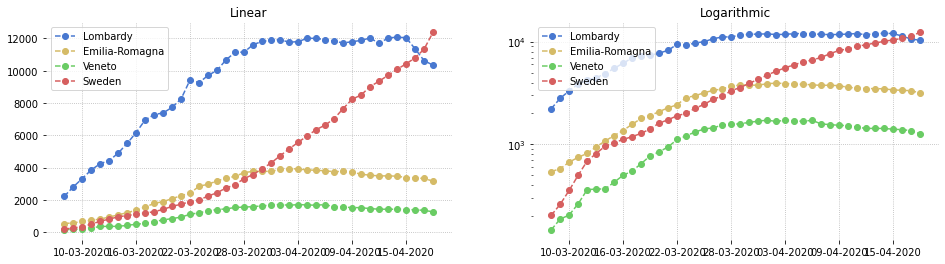

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

lom_hos = [2217, 2802, 3319, 3852, 4247, 4435, 
           4898, 5500, 6171, 6953, 7285, 7387,
           7735, 8258, 9439, 9266, 9711, 10026, 
           10681, 11137, 11152, 11613, 11815, 
           11883, 11927, 11762, 11802, 12002,
           12009, 11914, 11833, 11719, 11796,
           11877, 12026, 11696, 12028, 12077,
           12043, 11356, 10627, 10342]

er_hos = [542, 576, 669, 745, 814, 942, 1076, 
          1215, 1362, 1566, 1784, 1900, 2083, 2267, 
          2429, 2846, 2974, 3180, 3354, 3461, 3695, 
          3769, 3779, 3765, 3898, 3944, 3915, 3859,
          3839, 3804, 3750, 3769, 3722, 3596, 3530,
          3491, 3490, 3473, 3388, 3360, 3330, 3166]

ve_hos = [146, 186, 204, 262, 360, 366, 366, 
          426, 498, 548, 646, 771, 843, 942, 1113,
          1206, 1318, 1407, 1447, 1536, 1559, 1586,
          1633, 1680, 1718, 1670, 1714, 1691, 1674,
          1714, 1579, 1554, 1530, 1521, 1465, 1428,
          1427, 1427, 1402, 1388, 1359, 1264]

sweden_active = [202, 259, 354, 498, 685, 812, 958, 1036, 
                 1113, 1187, 1276, 1412, 1607, 1734, 1897, 
                 2003, 2243, 2448, 2747, 2948, 3326, 3574,
                 3928, 4291, 4735, 5157, 5566, 5961, 6350,
                 6634, 7026, 7653, 8233, 8498, 9016, 9352,
                 9717, 10087, 10427, 10794, 11337, 12382]

start = dt.date(2020, 3, 8)
end = start + dt.timedelta(days=len(lom_hos))
days = mdates.drange(start, end, dt.timedelta(days=1))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(days, lom_hos, '--bo', label='Lombardy')
ax1.plot(days, er_hos, '--yo', label='Emilia-Romagna')
ax1.plot(days, ve_hos, '--go', label='Veneto')
ax1.plot(days, sweden_active, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=6))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(122)
ax2.plot(days, lom_hos, '--bo', label='Lombardy')
ax2.plot(days, er_hos, '--yo', label='Emilia-Romagna')
ax2.plot(days, ve_hos, '--go', label='Veneto')
ax2.plot(days, sweden_active, '--ro', label='Sweden')
ax2.legend(loc="upper left")
ax2.set_title('Logarithmic')
ax2.set_yscale('log')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=6))
ax2.axes.grid(linestyle='dotted')

sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
fig.set_figheight(4)
fig.set_figwidth(16)
plt.show()

We then plot a pie chart by absolute number of total cases by region (Italy) and by county (Sweden). We then do the same by cases/10000 population, instead of absolute numbers. 

We also compare in a bar chart the percentage of cases by population for the italian regions and the 20 most affected swedish counties (all counties except Kalmar).

The data are for April 1 and April 10.

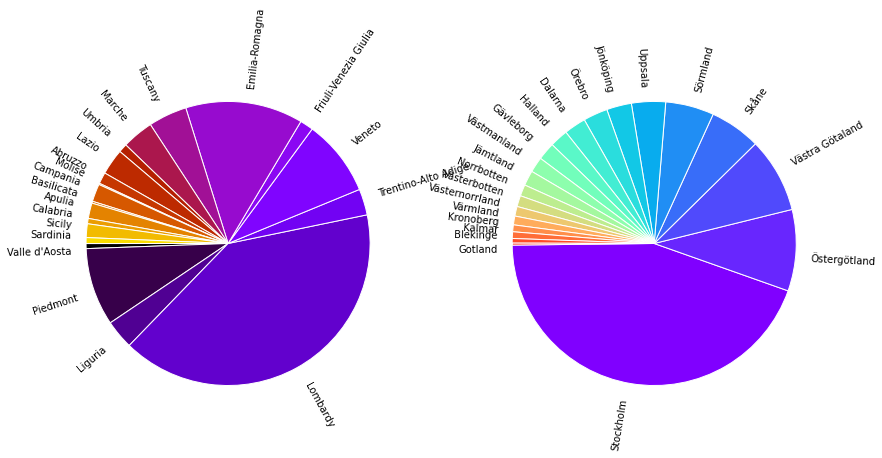

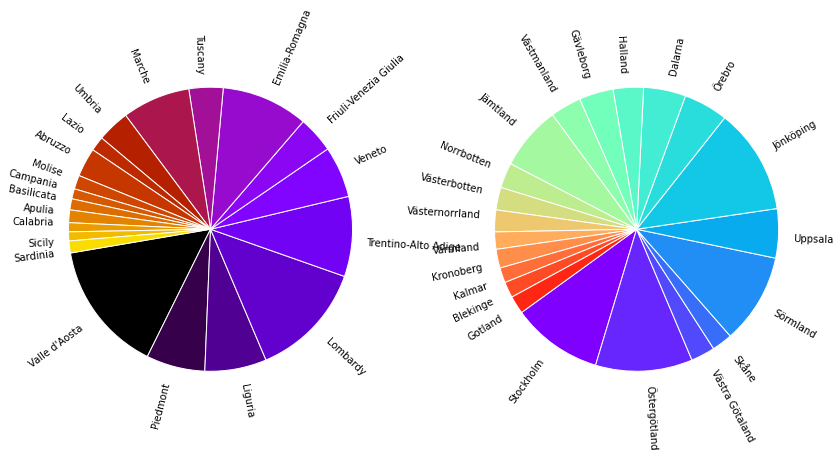

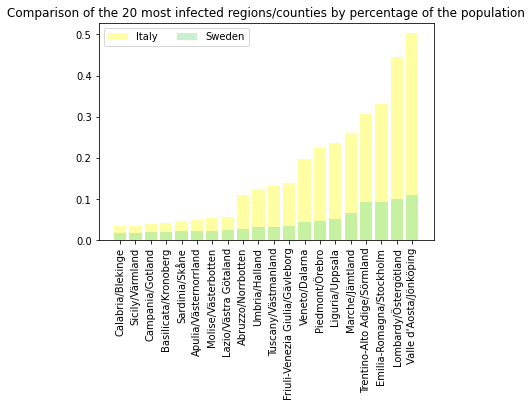

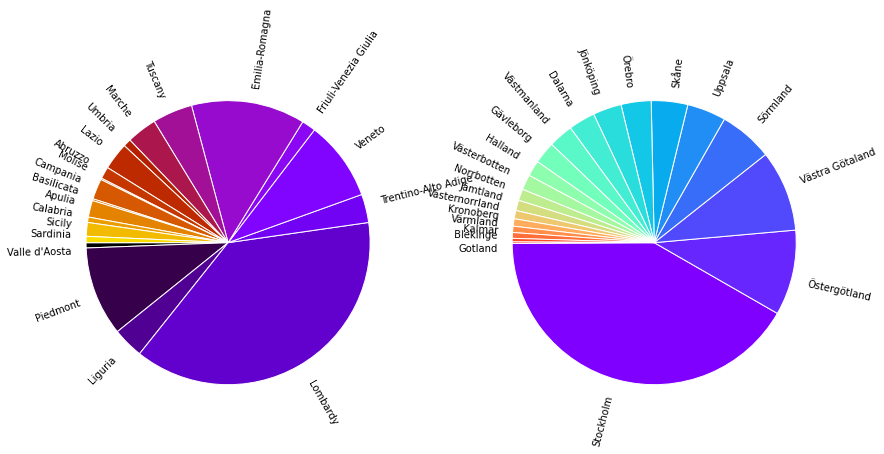

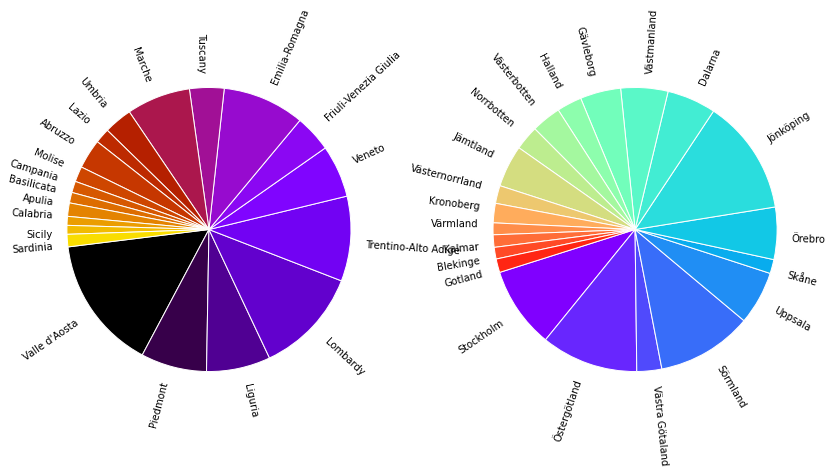

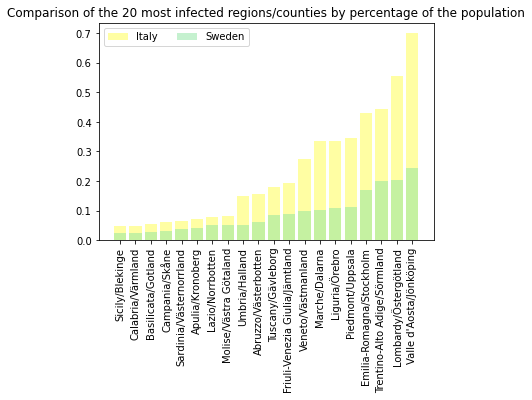

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle

italy_reg_1 = {'Valle d\'Aosta': 631, 'Piedmont': 9795, 'Liguria': 3660,
             'Lombardy': 44773, 'Trentino-Alto Adige': 3288, 'Veneto': 9625,
             'Friuli-Venezia Giulia': 1685, 'Emilia-Romagna': 14787, 'Tuscany': 4867,
             'Marche': 3962, 'Umbria': 1095, 'Lazio': 3264, 'Abruzzo': 1436,
             'Molise': 160, 'Campania': 2231, 'Basilicata': 237, 
             'Apulia': 1946, 'Calabria': 669, 'Sicily': 1718, 'Sardinia': 745}
             
italy_reg_10 = {'Valle d\'Aosta': 879, 'Piedmont': 15012, 'Liguria': 5191,
             'Lombardy': 56048, 'Trentino-Alto Adige': 4771, 'Veneto': 13421,
             'Friuli-Venezia Giulia': 2349, 'Emilia-Romagna': 19128, 'Tuscany': 6727,
             'Marche': 5084, 'Umbria': 1302, 'Lazio': 4583, 'Abruzzo': 2014,
             'Molise': 243, 'Campania': 3442, 'Basilicata': 308, 
             'Apulia': 2809, 'Calabria': 901, 'Sicily': 2302, 'Sardinia': 1063}

italy_pop = {'Valle d\'Aosta': 125332, 'Piedmont': 4356406, 'Liguria': 1550640,
             'Lombardy': 10078012, 'Trentino-Alto Adige': 1074524, 'Veneto': 4905854,
             'Friuli-Venezia Giulia': 1215220, 'Emilia-Romagna': 4459477, 'Tuscany': 3729641,
             'Marche': 1522608, 'Umbria': 879337, 'Lazio': 5867097, 'Abruzzo': 1304970,
             'Molise': 302931, 'Campania': 5772625, 'Basilicata': 559084, 
             'Apulia': 4012310, 'Calabria': 1935414, 'Sicily': 4969147, 'Sardinia': 1632892}

swe_reg_1 = {'Stockholm': 2224, 'Östergötland': 464, 'Västra Götaland': 427,
           'Skåne': 291, 'Sörmland': 276, 'Uppsala': 194, 'Jönköping': 142,
           'Örebro': 139, 'Dalarna': 125, 'Halland': 104, 'Gävleborg': 101,
           'Västmanland': 88, 'Jämtland': 86, 'Norrbotten': 65,
           'Västerbotten': 63, 'Västernorrland': 55, 'Värmland': 50,
           'Kronoberg': 39, 'Kalmar': 38, 'Blekinge': 26, 'Gotland': 11}

swe_reg_10 = {'Stockholm': 4061, 'Östergötland': 948, 'Västra Götaland': 902,
            'Sörmland': 597, 'Uppsala': 431, 'Skåne': 405, 'Örebro': 334, 
            'Jönköping': 317, 'Dalarna': 296, 'Västmanland': 273, 'Gävleborg': 245,
            'Halland': 175, 'Västerbotten': 169, 'Norrbotten': 128, 'Jämtland': 115, 
            'Västernorrland': 92, 'Kronoberg': 82, 'Värmland': 70,
            'Kalmar': 64, 'Blekinge': 39, 'Gotland': 17}

swe_pop = {'Stockholm': 2377081, 'Östergötland': 465495, 'Västra Götaland': 1725881,
           'Skåne': 1375278, 'Sörmland': 297540, 'Uppsala': 383713, 'Jönköping': 130810,
           'Örebro': 304805, 'Dalarna': 287966, 'Halland': 333848, 'Gävleborg': 287382,
           'Västmanland': 275845, 'Jämtland': 130810, 'Norrbotten': 250093,
           'Västerbotten': 271736, 'Västernorrland': 245347, 'Värmland': 282414,
           'Kronoberg': 201469, 'Kalmar': 245446, 'Blekinge': 159606, 'Gotland': 59686}

italy_percent_1 = {}
swe_percent_1 = {}
italy_percent_10 = {}
swe_percent_10 = {}

for key, value in italy_reg_1.items():
  italy_percent_1[key] = (value / italy_pop[key]) * 10000

for key, value in swe_reg_1.items():
  swe_percent_1[key] = (value / swe_pop[key]) * 10000

  
for key, value in italy_reg_10.items():
  italy_percent_10[key] = (value / italy_pop[key]) * 10000

for key, value in swe_reg_10.items():
  swe_percent_10[key] = (value / swe_pop[key]) * 10000


def plot(cmp1, data1, cmp2, data2):
  # From: https://gist.github.com/vals/5257113
  cmap = cmp1
  slices = [1,2,3] * 4 + [20, 25, 30] * 2
  shuffle(slices)
  slices = sorted(slices)
  small = slices[int(len(slices) / 2):]
  large = slices[:int(len(slices) / 2)]
  colors = cmap(np.arange(len(data1))/ len(data1))

  fig = plt.figure(figsize=[10, 10])
  ax1 = fig.add_subplot(121)
  angle = 180 + float(sum(large[::2])) / sum(data1.values()) * 360
  pie_wedge_collection = ax1.pie(data1.values(), colors=colors, labels=data1.keys(), 
                                 labeldistance=1.1, rotatelabels=True, startangle=angle)
  for pie_wedge in pie_wedge_collection[0]:
      pie_wedge.set_edgecolor('white')

  cmap = cmp2
  colors = cmap(np.arange(len(data2))/ len(data2))
  ax2 = fig.add_subplot(122)
  angle = 180 + float(sum(large[::2])) / sum(data2.values()) * 360
  pie_wedge_collection = ax2.pie(data2.values(), colors=colors, labels=data2.keys(), 
                                 labeldistance=1.1, rotatelabels=True, startangle=angle)

  for pie_wedge in pie_wedge_collection[0]:
      pie_wedge.set_edgecolor('white')

  fig.set_figwidth(14)
  plt.show()


def fill_plots(italy_reg, italy_percent, swe_reg, swe_percent):
  plot(plt.cm.gnuplot, italy_reg, plt.cm.rainbow, swe_reg)
  plot(plt.cm.gnuplot, italy_percent, plt.cm.rainbow, swe_percent)

  italy_percent = {k: (v / 100) for k, v in sorted(italy_percent.items(), key=lambda item: item[1])}
  swe_percent = {k: (v / 100) for k, v in sorted(swe_percent.items(), key=lambda item: item[1])}
  swe_percent.pop('Kalmar', None)

  x_s = [k for k in italy_percent.keys()]
  for idx, val in enumerate(swe_percent.keys()):
    x_s[idx] += ("/" + val)

  sns.set_color_codes('pastel')
  plt.bar(x_s, italy_percent.values(), color='y', label='Italy')
  plt.bar(x_s, swe_percent.values(), color='g', alpha=0.5, label='Sweden')
  plt.xticks(x_s, rotation='vertical')
  plt.legend(ncol = 2, loc = 'upper left')
  plt.title('Comparison of the 20 most infected regions/counties by percentage of the ' 
            + 'population')
  plt.show()

fill_plots(italy_reg_1, italy_percent_1, swe_reg_1, swe_percent_1)
fill_plots(italy_reg_10, italy_percent_10, swe_reg_10, swe_percent_10)

At last, we look at the Google Trends for a few queries that have recently gained popularity in the two countries. 

Data last updated on April 2.

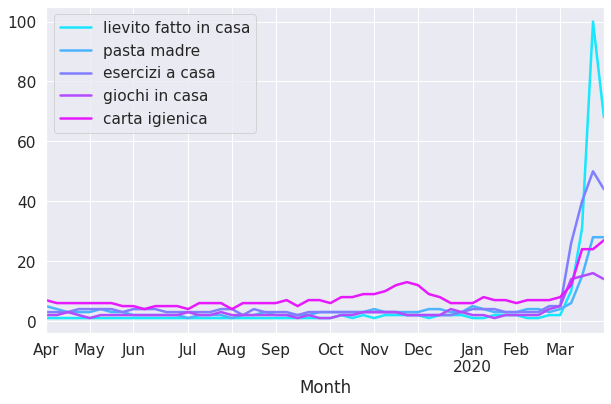

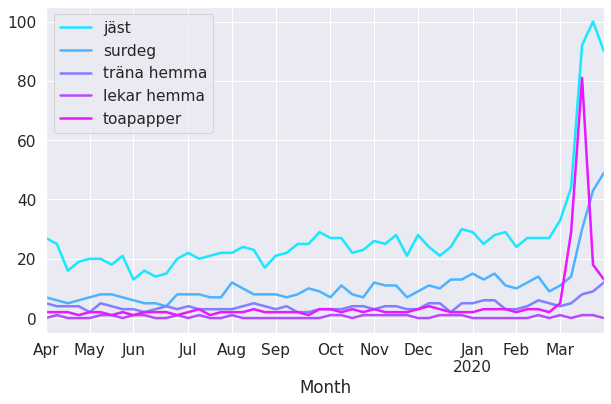

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

data_it = pd.read_csv('timeline_ita.csv', header=1)
data_swe = pd.read_csv('timeline_swe.csv', header=1)

data_it = data_it.rename(columns=lambda x: x.replace(': (Italy)', ''))
data_swe = data_swe.rename(columns=lambda x: x.replace(': (Sweden)', ''))
data_it['Week'] = [dt.datetime.strptime(x, '%Y-%m-%d') for x in data_it['Week']]
data_swe['Week'] = [dt.datetime.strptime(x, '%Y-%m-%d') for x in data_swe['Week']]

data_it['lievito fatto in casa'] = data_it['lievito fatto in casa'].apply(lambda x: 
                                                                    int(x.replace('<', '')))

data_swe['lekar hemma'] = data_swe['lekar hemma'].apply(lambda x: int(x.replace('<', '')))

colors = plt.cm.cool(np.linspace(0.1,0.9,5))
sns.set(font_scale=1.4)
data_it.set_index('Week', inplace=True)
ax1 = data_it.plot(figsize=(10, 6), linewidth=2.5, color=colors)
ax1.set_xlabel('Month')

data_swe.set_index('Week', inplace=True)
ax2 = data_swe.plot(figsize=(10, 6), linewidth=2.5, color=colors)
ax2.set_xlabel('Month')
plt.show()


